<a href="https://colab.research.google.com/github/oscarserc/LENGUAJE_NLP/blob/main/Transformers_6_HuggingFace_Question_Answering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# -----------------------------------------------------------
# PRACTICAS DE: Natural Language Processing with Transformers  - CAPITULO 7
# -----------------------------------------------------------

# GitHub del libro: https://github.com/nlp-with-transformers/notebooks

# Uncomment and run this cell if you're on Colab or Kaggle
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
from install import *
install_requirements()



Cloning into 'notebooks'...
remote: Enumerating objects: 422, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 422 (delta 0), reused 5 (delta 0), pack-reused 416
Receiving objects: 100% (422/422), 24.97 MiB | 22.47 MiB/s, done.
Resolving deltas: 100% (190/190), done.
/content/notebooks
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!


#**Buscamos bases de datos en HUGGING FACE relacionadas con el 'Question Answering'. Están agrupadas bajo el epígrafe**: ' *subjqa* '.
#Vemos el tipo de temática disponible primero.

In [ ]:

from datasets import get_dataset_config_names

domains = get_dataset_config_names('subjqa')
domains


Downloading:   0%|          | 0.00/2.65k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

['books', 'electronics', 'grocery', 'movies', 'restaurants', 'tripadvisor']

#Elegimos la temática de electrónica.

In [ ]:

from datasets import load_dataset

subjqa = load_dataset('subjqa', name='electronics')
subjqa


Downloading: 0.00B [00:00, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset subjqa downloaded and prepared to /root/.cache/huggingface/datasets/subjqa/electronics/1.1.0/e5588f9298ff2d70686a00cc377e4bdccf4e32287459e3c6baf2dc5ab57fe7fd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
        num_rows: 1295
    })
    test: Dataset({
        features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
        num_rows: 358
    })
    validation: Dataset({
        features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
        num_rows: 255
    })
})

#Accedemos a los diferentes campos de manera similar a un DICCIONARIO de Python.
#Según el libro es una estructura: 'Arrow'.

In [ ]:

print(subjqa['train']['answers'][1])

#  {'text': ['Bass is weak as expected', 'Bass is weak as expected, even with EQ adjusted up'], 
#   'answer_start': [1302, 1302], 
#   'answer_subj_level': [1, 1], 
#   'ans_subj_score': [0.5083333253860474, 0.5083333253860474], 
#   'is_ans_subjective': [True, True]}


{'text': ['Bass is weak as expected', 'Bass is weak as expected, even with EQ adjusted up'], 'answer_start': [1302, 1302], 'answer_subj_level': [1, 1], 'ans_subj_score': [0.5083333253860474, 0.5083333253860474], 'is_ans_subjective': [True, True]}


In [ ]:

# Marcamos con *** algunas de las features que 
# necesitaremos luego

#  features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 
#             'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', '***title***', 
#             '***context***', '***question***', '***answers.text***', '***answers.answer_start***', 'answers.answer_subj_level', 
#             'answers.ans_subj_score', 'answers.is_ans_subjective'],

subjqa.flatten().items()


dict_items([('train', Dataset({
    features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers.text', 'answers.answer_start', 'answers.answer_subj_level', 'answers.ans_subj_score', 'answers.is_ans_subjective'],
    num_rows: 1295
})), ('test', Dataset({
    features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers.text', 'answers.answer_start', 'answers.answer_subj_level', 'answers.ans_subj_score', 'answers.is_ans_subjective'],
    num_rows: 358
})), ('validation', Dataset({
    features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers.text', 'answ

In [ ]:

import pandas as pd

dfs = {split: dset.to_pandas() for split, dset in subjqa.flatten().items()}
dfs['train'][:2]


,domain,nn_mod,nn_asp,query_mod,query_asp,q_reviews_id,question_subj_level,ques_subj_score,is_ques_subjective,review_id,id,title,context,question,answers.text,answers.answer_start,answers.answer_subj_level,answers.ans_subj_score,answers.is_ans_subjective
0,electronics,great,bass response,excellent,bass,0514ee34b672623dff659334a25b599b,5,0.5,False,882b1e2745a4779c8f17b3d4406b91c7,2543d296da9766d8d17d040ecc781699,B00001P4ZH,"I have had Koss headphones in the past, Pro 4A...",How is the bass?,[],[],[],[],[]
1,electronics,harsh,high,not strong,bass,7c46670208f7bf5497480fbdbb44561a,1,0.5,False,ce76793f036494eabe07b33a9a67288a,d476830bf9282e2b9033e2bb44bbb995,B00001P4ZH,To anyone who hasn't tried all the various typ...,Is this music song have a goo bass?,"[Bass is weak as expected, Bass is weak as exp...","[1302, 1302]","[1, 1]","[0.5083333, 0.5083333]","[True, True]"


In [ ]:

import pandas as pd

dfs = {split: dset.to_pandas() for split, dset in subjqa.flatten().items()}

for split, df in dfs.items():
  # unique()  ----> saca por pantalla códigos
  # nunique() ----> cuenta los valores
  print(f"Number of questions in {split}: {df['id'].nunique()}")



Number of questions in train: 1295
Number of questions in test: 358
Number of questions in validation: 255


In [ ]:

dfs['train'].columns


Index(['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id',
       'question_subj_level', 'ques_subj_score', 'is_ques_subjective',
       'review_id', 'id', 'title', 'context', 'question', 'answers.text',
       'answers.answer_start', 'answers.answer_subj_level',
       'answers.ans_subj_score', 'answers.is_ans_subjective'],
      dtype='object')

In [ ]:

dfs['train']['question']


0                            How is the bass?
1         Is this music song have a goo bass?
2                            How is the bass?
3                      How is the audio bass?
4          Why do I have an incredible sound?
                        ...                  
1290              Where can I feel my device?
1291    How does the selector protection  me?
1292                         How is the grip?
1293                     How is the keyboard?
1294                     How is the keyboard?
Name: question, Length: 1295, dtype: object

In [ ]:

dfs['train']['answers.text']


0                                                      []
1       [Bass is weak as expected, Bass is weak as exp...
2               [The only fault in the sound is the bass]
3                               [the best of all of them]
4       [The sound is so crisp, crazy obsession with s...
                              ...                        
1290                                                   []
1291                                                   []
1292                                                   []
1293    [the keyboard is very easy to use, the keyboar...
1294                     [is easy to use and works great]
Name: answers.text, Length: 1295, dtype: object

In [ ]:

qa_cols = ['title', 'question', 'answers.text', 'answers.answer_start', 'context']

sample_df = dfs['train'][qa_cols].sample(2, random_state=7)
sample_df


,title,question,answers.text,answers.answer_start,context
791,B005DKZTMG,Does the keyboard lightweight?,[this keyboard is compact],[215],I really like this keyboard. I give it 4 star...
1159,B00AAIPT76,How is the battery?,[],[],I bought this after the first spare gopro batt...


In [ ]:

start_idx = sample_df['answers.answer_start'].iloc[0][0]
end_idx   = start_idx + len(sample_df['answers.text'].iloc[0][0])
sample_df['context'].iloc[0][start_idx:end_idx]


'this keyboard is compact'

#Analizamos un poco más detenidamente la frecuencia con la que aparecen los tipos de preguntas más frecuentes.

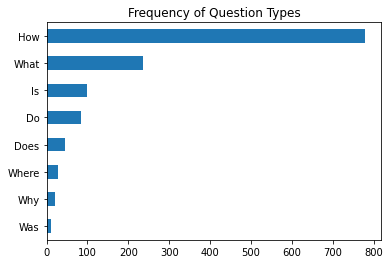

In [ ]:

import matplotlib.pyplot as plt

counts = {}
question_types = ['What', 'How', 'Is', 'Does', 'Do', 'Was', 'Where', 'Why']

for q in question_types:
  counts[q] = dfs['train']['question'].str.startswith(q).value_counts()[True]

pd.Series(counts).sort_values().plot.barh()
plt.title('Frequency of Question Types')
plt.show()  


In [ ]:

for question_type in ['How', 'What', 'Is']:
  for question in (dfs['train'][dfs['train'].question.str.startswith(question_type)].sample(n=3, random_state=42)['question']):
    print(question)


How is the camera?
How do you like the control?
How fast is the charger?
What is direction?
What is the quality of the construction of the bag?
What is your impression of the product?
Is this how zoom works?
Is sound clear?
Is it a wireless keyboard?


#**Pasamos al uso de TRANSFORMERS con la base de datos que hemos seleccionado**.

In [ ]:

from transformers import AutoTokenizer

model_ckpt = 'deepset/minilm-uncased-squad2'
tokenizer  = AutoTokenizer.from_pretrained(model_ckpt)


Downloading:   0%|          | 0.00/107 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/477 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

#Probamos con un pequeño ejemplo.

In [ ]:

question = 'How much music can this hold?'
context  = """An MP3 is about 1 MB/minute, so about 6000 hours depending on file size."""

inputs   = tokenizer(question, context, return_tensors='pt')
inputs


{'input_ids': tensor([[  101,  2129,  2172,  2189,  2064,  2023,  2907,  1029,   102,  2019,
         23378,  2003,  2055,  1015, 16914,  1013,  3371,  1010,  2061,  2055,
         25961,  2847,  5834,  2006,  5371,  2946,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]])}

In [ ]:

input_df = pd.DataFrame.from_dict(tokenizer(question, context), orient='index')
input_df


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
input_ids,101,2129,2172,2189,2064,2023,2907,1029,102,2019,...,2061,2055,25961,2847,5834,2006,5371,2946,1012,102
token_type_ids,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
attention_mask,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:

print(tokenizer.decode(inputs['input_ids'][0]))


[CLS] how much music can this hold? [SEP] an mp3 is about 1 mb / minute, so about 6000 hours depending on file size. [SEP]


#Probamos con AutoModel para la tarea de Question Answering.

In [ ]:

import torch
from transformers import AutoModelForQuestionAnswering

model = AutoModelForQuestionAnswering.from_pretrained(model_ckpt)

with torch.no_grad():
  outputs = model(**inputs)
print(outputs)  


Downloading:   0%|          | 0.00/127M [00:00<?, ?B/s]

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-0.9862, -4.7750, -5.4025, -5.2378, -5.2863, -5.5117, -4.9819, -6.1880,
         -0.9862,  0.2596, -0.2144, -1.7136,  3.7806,  4.8561, -1.0546, -3.9097,
         -1.7374, -4.5944, -1.4278,  3.9949,  5.0391, -0.2018, -3.0193, -4.8549,
         -2.3107, -3.5110, -3.5713, -0.9862]]), end_logits=tensor([[-0.9623, -5.4733, -5.0326, -5.1639, -5.4278, -5.5151, -5.1749, -4.6233,
         -0.9623, -3.7855, -0.8715, -3.7745, -3.0162, -1.1780,  0.1758, -2.7365,
          4.8934,  0.3046, -3.1761, -3.2762,  0.8937,  5.6606, -0.3623, -4.9554,
         -3.2531, -0.0914,  1.6211, -0.9623]]), hidden_states=None, attentions=None)


In [ ]:

start_logits = outputs.start_logits
end_logits   = outputs.end_logits


In [ ]:

print(f'Input IDs shape: {inputs.input_ids.size()}')
print(f'Start logits shape: {start_logits.size()}')
print(f'End logits shape: {end_logits.size()}')


Input IDs shape: torch.Size([1, 28])
Start logits shape: torch.Size([1, 28])
End logits shape: torch.Size([1, 28])


#Visualizamos los logits de cada palabra.

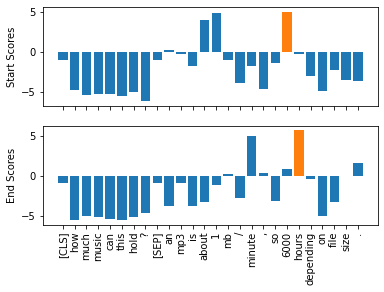

In [ ]:

# Tipo de visualización:
# https://mccormickml.com/2020/03/10/question-answering-with-a-fine-tuned-BERT

import numpy as np
import matplotlib.pyplot as plt

#  start_logits
#  tensor([[-0.9862, -4.7750, -5.4025, -5.2378, -5.2863, -5.5117, -4.9819, -6.1880,
#           -0.9862,  0.2596, -0.2144, -1.7136,  3.7806,  4.8561, -1.0546, -3.9097,
#           -1.7374, -4.5944, -1.4278,  3.9949,  5.0391, -0.2018, -3.0193, -4.8549,
#           -2.3107, -3.5110, -3.5713, -0.9862]])

#  s_scores = start_logits.detach().numpy()
#  array([[-0.9862098 , -4.774999  , -5.402536  , -5.2377667 , -5.28628   ,
#          -5.5117335 , -4.981947  , -6.1880217 , -0.9862166 ,  0.2595919 ,
#          -0.21436447, -1.7135707 ,  3.7806432 ,  4.856103  , -1.0546458 ,
#          -3.9096975 , -1.7374043 , -4.59436   , -1.42783   ,  3.9949126 ,
#           5.0390544 , -0.20180053, -3.0192895 , -4.8549128 , -2.3107488 ,
#          -3.5109997 , -3.5712872 , -0.9862078 ]], dtype=float32)

#  s_scores = start_logits.detach().numpy().flatten()
#  array([-0.9862098 , -4.774999  , -5.402536  , -5.2377667 , -5.28628   ,
#         -5.5117335 , -4.981947  , -6.1880217 , -0.9862166 ,  0.2595919 ,
#         -0.21436447, -1.7135707 ,  3.7806432 ,  4.856103  , -1.0546458 ,
#         -3.9096975 , -1.7374043 , -4.59436   , -1.42783   ,  3.9949126 ,
#          5.0390544 , -0.20180053, -3.0192895 , -4.8549128 , -2.3107488 ,
#         -3.5109997 , -3.5712872 , -0.9862078 ], dtype=float32)

s_scores = start_logits.detach().numpy().flatten()
e_scores = end_logits.detach().numpy().flatten()
tokens   = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
colors = ['C0' if s != np.max(s_scores) else 'C1' for s in s_scores]
ax1.bar(x=tokens, height=s_scores, color=colors)
ax1.set_ylabel('Start Scores')

colors = ['C0' if s != np.max(e_scores) else 'C1' for s in e_scores]
ax2.bar(x=tokens, height=e_scores, color=colors)
ax2.set_ylabel('End Scores')

plt.xticks(rotation='vertical')
plt.show()


#Analizamos algunos de los casos.

In [ ]:

import torch

start_idx = torch.argmax(start_logits)
end_idx   = torch.argmax(end_logits) + 1

answer_span = inputs['input_ids'][0][start_idx : end_idx]
answer      = tokenizer.decode(answer_span)

print(f'Question: {question}')
print(f'Answer: {answer}')


Question: How much music can this hold?
Answer: 6000 hours


In [ ]:

from transformers import pipeline

pipe = pipeline('question-answering', model=model, tokenizer=tokenizer)
pipe(question=question, context=context, top_k=3)


[{'answer': '6000 hours', 'end': 48, 'score': 0.2651623487472534, 'start': 38},
 {'answer': '1 MB/minute, so about 6000 hours',
  'end': 48,
  'score': 0.22082945704460144,
  'start': 16},
 {'answer': '1 MB/minute',
  'end': 27,
  'score': 0.10253474861383438,
  'start': 16}]

In [ ]:

# Si pongo como en el libro: handle_impossible_answer=True
# aparece ERROR

# Salen campos distintos
pipe(question='Why is there no data?', context=context, handle_impossible_answer=False)


{'answer': '1 MB/minute, so about 6000 hours depending on file size',
 'end': 71,
 'score': 0.000262648391071707,
 'start': 16}

#Análisis con pasajes más largos.

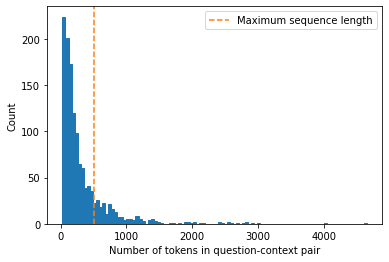

In [ ]:

def compute_input_length(row):
  inputs = tokenizer(row['question'], row['context'])
  return len(inputs['input_ids'])

dfs['train']['n_tokens'] = dfs['train'].apply(compute_input_length, axis=1)

fig, ax = plt.subplots()
dfs['train']['n_tokens'].hist(bins=100, grid=False, ec='C0', ax=ax)
plt.xlabel('Number of tokens in question-context pair')
ax.axvline(x=512, ymin=0, ymax=1, linestyle='--', color='C1',
           label='Maximum sequence length')
plt.legend()
plt.ylabel('Count')
plt.show()
